### Задача - на основании имеющихся данных о физических параметрах грибов, построить модель классификации о том, можно или нельзя есть данный гриб.

Target - колонка class

Все остальные - признаки

Постараться использовать все изученные техники:

- если есть, заполнить  пропуски
- посмотреть корреляции и выбрать только нужные признаки
- удалить выбросы (значения выпадающие за 90% квантиль)
- закодировать категориальные признаки
- оценить баланс классов

Построить модель и оценить результат

Оформить результат в виде блокнота, следующего наименования **ДЗ_Фамилия_Имя.ipynb** и положить в исходную папку

Начнемс бибилиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

загрузда таблици

In [2]:
df = pd.read_csv('mushroom_cleaned.csv.zip')

посмотрим на часть данных , подумаем как их закодирвоать

In [41]:
df.head(15)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
5,1337,6,2,10,3.775635,1520,11,0.943195,1
6,1300,2,2,10,3.835320,1563,11,1.804273,1
7,1354,6,2,10,3.676160,1532,11,0.888450,1
8,1222,6,2,10,3.771656,1476,11,0.943195,1
9,1085,6,2,10,3.775635,1581,11,0.888450,1


с певрого взляда категориальных данных не обнаружино, посомтри на их типы

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


как мы видим ниодного столбика с обектами, все столбики только целые или буловые 

отделим признаки от таргета, чтобы не задевать пока таргет)

In [5]:
feature = df.drop(['class'], axis = 1)
feature.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,1372,2,2,10,3.807467,1545,11,1.804273
1,1461,2,2,10,3.807467,1557,11,1.804273
2,1371,2,2,10,3.612496,1566,11,1.804273
3,1261,6,2,10,3.787572,1566,11,1.804273
4,1305,6,2,10,3.711971,1464,11,0.943195


посмотрим на описание данных

In [6]:
feature.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273


как вы мидем данные выпадающие за 3 стандартных отклонение от среднего только cap-diameter  и stem-width и stem-height

In [7]:
#Сделаем небольшую функцию для масового построки плотов, незнаю на сколько оплена, но я могу и поему бы нет)
def graph(a,b,data):
    a,b,c = 4,2,0
    plt.figure(figsize=(10, 15))

    for i in data:
        plt.subplot(a,b,c+1)
        sns.boxplot(data[i])
        plt.title(i)
        c += 1
    plt.tight_layout()
    plt.show()

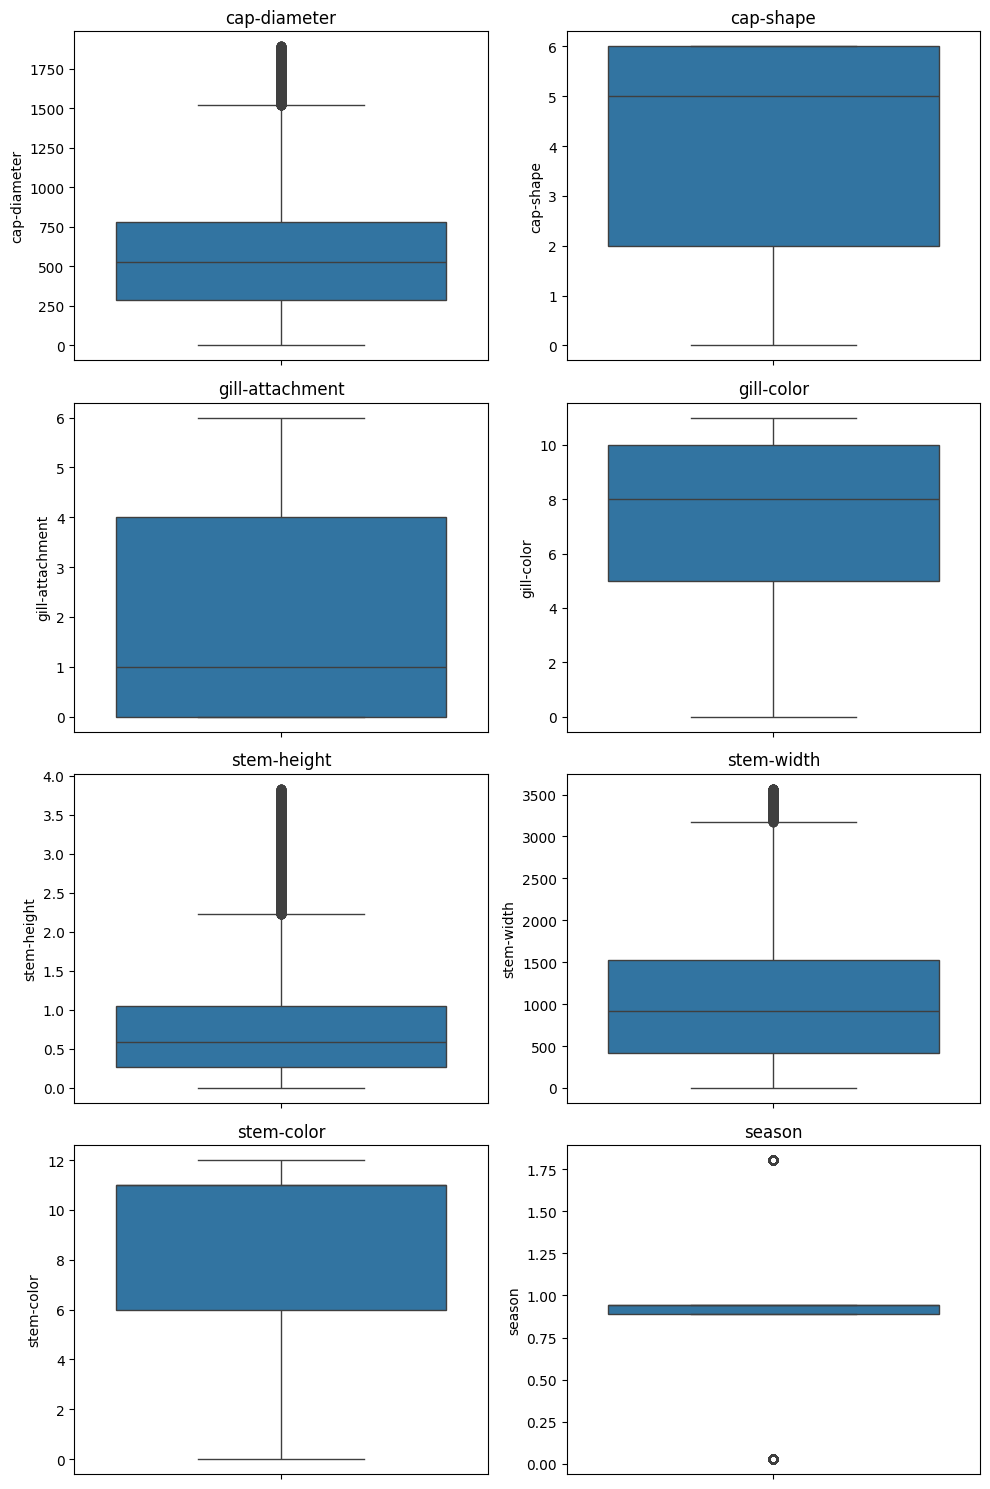

In [8]:
graph(4,2,feature)

как мы дим наши опасени оправдалить, выбросы замеченый на ранее описаных колонках

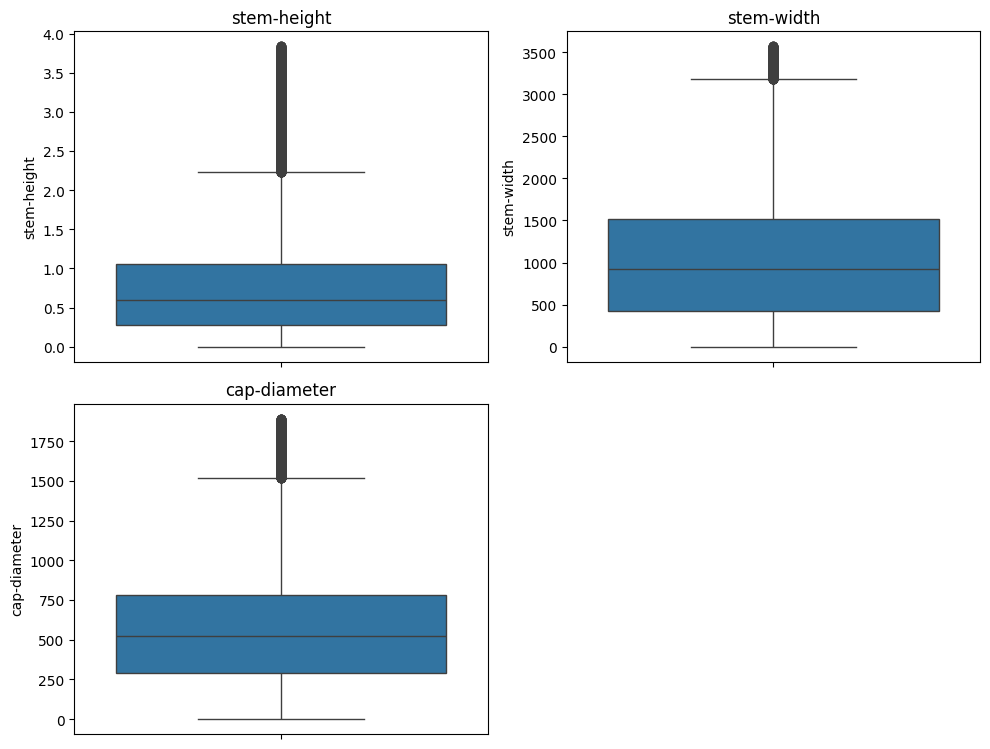

In [9]:
graph(1,3,feature[['stem-height','stem-width','cap-diameter']])

импортирования seaborn для простроение матрици корреляции

<Axes: >

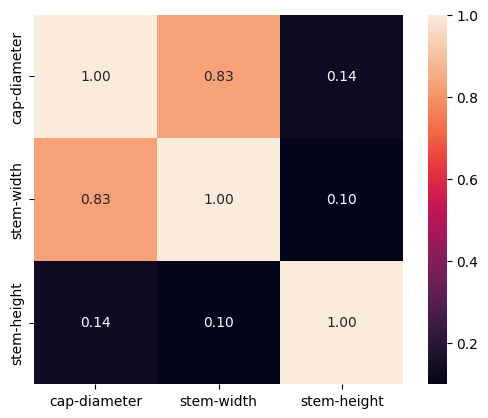

In [10]:
sns.heatmap(
    feature[['cap-diameter','stem-width','stem-height']].corr(),
    annot = True,
    fmt='.2f',
    square=True
)

как мы можем видить наши "выбросы" сильноскореливароные между друг другом

<Axes: >

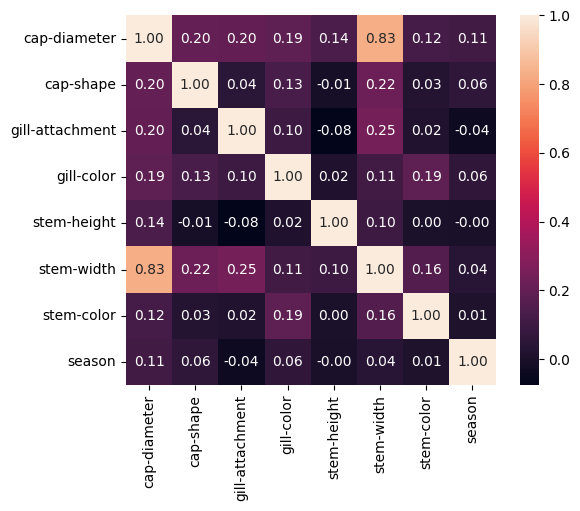

In [42]:
sns.heatmap(
    feature.corr(),
    annot = True,
    fmt='.2f',
    square=True
)

как мы видим из матрици корелции мы видим что данные максимально не скорелированые , кроме  stem-width и cap-diameter , ранее упомянутый stem-height не так сильно коррелируеться с другими так тчо можем его нещадить

попробуем разные преобразования

посмотрим на пустые значени и их кол-во

In [12]:
feature.isna().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
dtype: int64

мы видем что пропусков 0 и их обрабатывать не следует

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
X = feature
y = df['class']

In [31]:
X_train, X_test, y_train, y_test= train_test_split(X,y,
                                                    test_size=0.15,
                                                    random_state=42)

In [32]:
pipe = Pipeline(
    [
        ('Scaler',StandardScaler()),
        ('LR',LogisticRegression())
    ]
)

In [33]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('LR', LogisticRegression())])

Оценка mae ошибки для модели

In [38]:
pred = pipe.predict(X_test)
mae = mean_absolute_error(pred, y_test)
print(f'MAE : {mae:.2}%')

MAE : 0.36%


оценка точности класс, на 88% модель сказала  правильный ответ

In [39]:
pipe.score(X_test,y_test)

0.6390328151986183

In [40]:
X_test.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
14085,826,2,0,10,0.044195,2433,6,1.804273
19006,571,6,2,4,0.536738,761,4,0.943195
50623,1122,2,0,0,0.450051,1942,11,0.943195
41819,278,2,0,4,0.190566,576,11,0.943195
8085,735,2,6,10,1.455884,1077,11,0.888450


c:\Users\grimm\Documents\Stronghold_of_Digital_Martyrdom\Data_Science\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


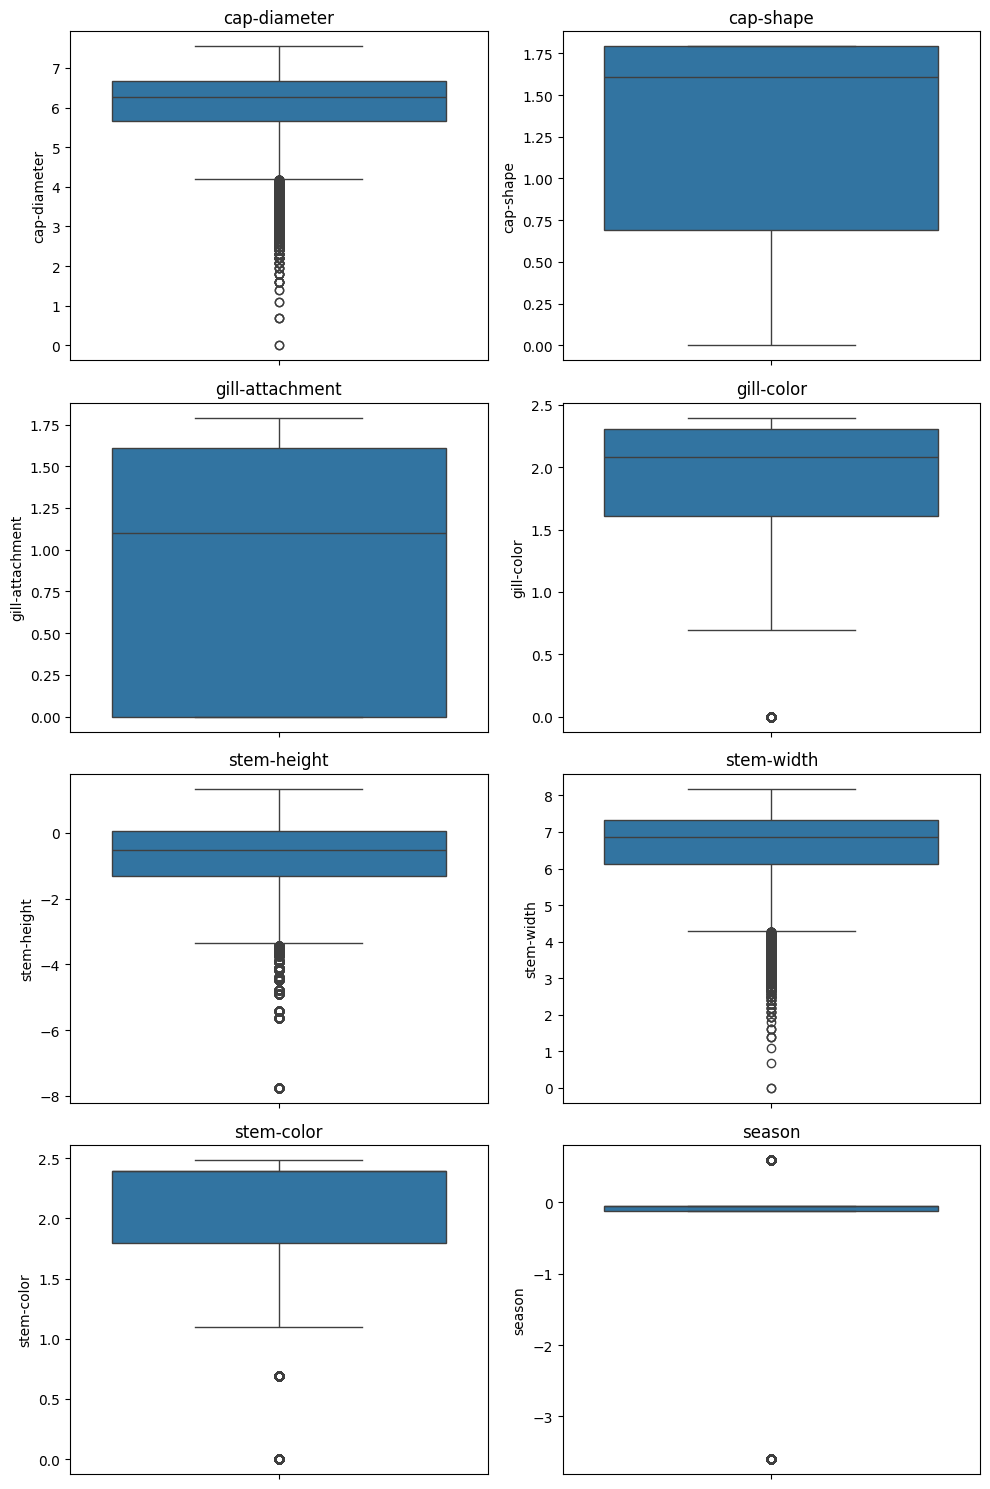

None


KeyboardInterrupt: 

In [ ]:
log_transform = np.log(df)
print(graph(2,4,log_transform.drop(['class'], axis = 1)))
print(sns.heatmap(log_transform.drop(['class'], axis = 1), annot = True))